## Deep Learning 101 : Multilayer Perceptrons 
Some intro text

In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.datasets import make_circles

from keras.layers import Input, Dense
from keras.models import Sequential

X, y = make_circles(n_samples=5000, factor=.3, noise=.05)
X_train = X[:4000]
y_train = y[:4000]

X_val = X[4000:]
y_val = y[4000:]
num_variables = X.shape[1]

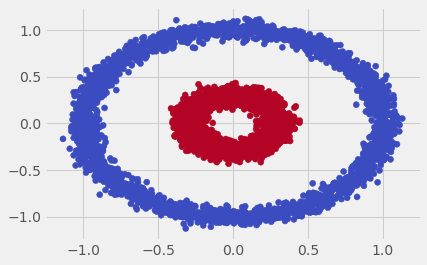

In [65]:
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.coolwarm)
plt.show()

## A first model with logistic regression 

The first thing we have to do is to set up an input tensor. One the key advantages of using keras is that you only have to specify the shapes for the inputs and outputs, the shapes for the remaining tensors will be inferred automatically. 

In our case, each input vector $x_i = <x_{i1},x_{i2}>$ has two dimensions and the output is a single binary variable $y_i \in \{0,1\}$. Let's see how we would set this up with keras:

In [18]:
logreg = Sequential()
logreg.add(Dense(output_dim=1, input_dim=num_variables, activation='sigmoid'))

The first line tells keras to initialze a new __sequential__ model. Sequential models take a single input tensor and produce a single output tensor. For the purposes of this tutorial, we're going to stick with the sequential model because it will have all of the functionality we'll need.

The bulk of the action happens on the second line, and it's a litte terse so let's unpack it:

- `logreg.add` tells keras that we want to add a new layer to our network.
- `Dense` specifies that we want to use a fully-connected layer, aka a dense layer and is probably most opaque aspect of the keras API. In general, what a dense layer does create several different linear combinations of the output of the previous layer, followed by an element-wise application of an __activation function__. The number of linear combinations is specified by the number of 'hidden units' in the layer, which in this case is specified by `output_dim`.
- `input_dim=num_variables` - Since this is the first layer in our network, we have to tell keras how big the input will be. In this case 
- `activation='sigmoid'` specifies which element-wise transformation we should apply the resulting output. Here we've specified a sigmoid transformation, which is given by $\frac{1}{1 + \exp(-t)}$, where $t$ is the result of the linear combination. This function 'squashes' the linear combination to be a number between 0 and 1. 

Putting that all together, we are telling keras that we'd like a single linear combination of the input variables, followed by a sigmoid transformation, which will represent the probability that an observation belongs to the class $y=1$. In this case, the __Dense__ layer will have 2 parameters/weights $\{w_1,w_2\}$ and intercept/bias term $w_0$ since this is included by default. 

Since this is a relatively simple case, we can write out the actual function implied by this model. It looks like this:
<center>
$ 
\frac{1}{1 + \exp(-(w0 + w1*x_{i1} + w2*x_{i2}))}
$
</center>

As you might be able to see now, this is equivalent to a logistic regression model, where we are modeling the log-odds as linear function of the input variables.

Enough talking, let's fit the model! That's easily enough accomplished in another 2 lines:

In [14]:
logreg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
logreg.fit(X_train, y_train,validation_data=[X_val,y_val])

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s - loss: 0.7294 - acc: 0.4952 - val_loss: 0.7207 - val_acc: 0.5000

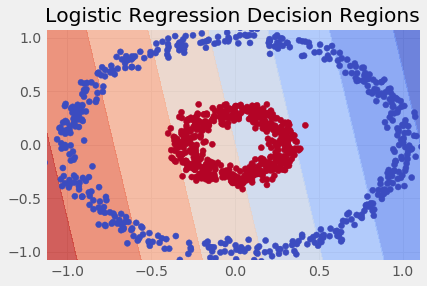

In [67]:
# create a mesh to plot in
h = 0.02
x_min, x_max = X_val[:, 0].min(), X_val[:, 0].max()
y_min, y_max = X_val[:, 1].min(), X_val[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression Decision Regions")
plt.show()

In [58]:
num_hidden = 5
mlp = Sequential()
mlp.add(Dense(output_dim=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(output_dim=1, activation='sigmoid'))

In [59]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],nb_epoch=10,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s - loss: 0.7230 - acc: 0.4838 - val_loss: 0.6938 - val_acc: 0.4730

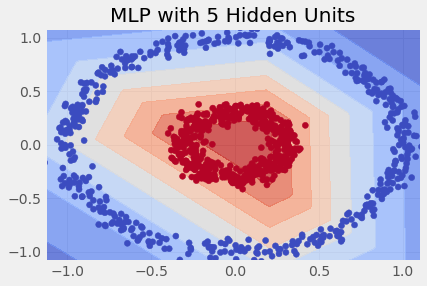

In [60]:
# create a mesh to plot in
h = 0.02
x_min, x_max = X_val[:, 0].min(), X_val[:, 0].max()
y_min, y_max = X_val[:, 1].min(), X_val[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLP with " + str(num_hidden) + " Hidden Units")
plt.show()

We can see that a neural network with 5 hidden units is trying to stitch together 6 (we get an extra constant from the output bias) piecewise linear functions in an effort to classify the points.

In [63]:
num_hidden = 128
mlp = Sequential()
mlp.add(Dense(output_dim=num_hidden, input_dim=num_variables, activation='relu'))
mlp.add(Dense(output_dim=1, activation='sigmoid'))
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mlp.fit(X_train, y_train,validation_data=[X_val,y_val],nb_epoch=10,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 0s - loss: 0.6114 - acc: 0.6218 - val_loss: 0.5199 - val_acc: 0.9960

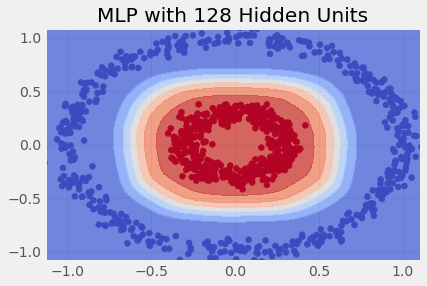

In [64]:
# create a mesh to plot in
h = 0.02
x_min, x_max = X_val[:, 0].min(), X_val[:, 0].max()
y_min, y_max = X_val[:, 1].min(), X_val[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLP with " + str(num_hidden) + " Hidden Units")
plt.show()